# Dataset for mosquito collections on Big Pine Key, Florida, USA

In [1]:
import pandas as pd
import numpy as np
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [87]:
florida = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/florida_1998_to_2019.csv')
temperature = pd.read_csv('https://raw.githubusercontent.com/Juanfra21/mosquito-population-model/main/data/weather_data.csv')

In [88]:
temperature = temperature[['datetime', 'humidity', 'temp', 'precip', 'windspeed']]

# Temperature

In [89]:

# Now create the DATE column without spaces in the names
temperature['datetime'] = pd.to_datetime(temperature['datetime'], errors='coerce')
temperature.rename(columns={'datetime': 'Date'}, inplace=True)
temperature

,Date,humidity,temp,precip,windspeed
0,1998-01-01,64.1,16.5,0.000,37.0
1,1998-01-02,72.3,19.8,0.000,34.5
2,1998-01-03,82.9,21.6,0.000,31.2
3,1998-01-04,89.2,22.7,0.300,36.2
4,1998-01-05,90.5,23.4,0.000,24.2
...,...,...,...,...,...
8030,2019-12-27,78.5,25.2,0.451,21.5
8031,2019-12-28,81.5,25.6,0.000,18.6
8032,2019-12-29,82.3,25.8,1.442,22.8
8033,2019-12-30,85.3,25.3,3.144,20.8


# Mosquito abundance

In [90]:
florida

,YEAR,DOY,TAEN,DEIN,NIGR,ATRO,QUIN,CRUC,BAHA,INFI,...,ALBI,COND,MULR,PILO,DECL,INOR,GRAB,TITI,UNID,TOTAL
0,1998,232,"1,272.00",76,4,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,354.00"
1,1998,237,"4,792.00",48,24,0,NaN,0,0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,008.00"
2,1998,244,"4,000.00",0,0,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000.00"
3,1998,251,488,0,0,1,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490
4,1998,253,"1,324.00",4,0,8,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,336.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2019,56,404,12,0,1,0.0,0,1,0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435
994,2019,64,21,1,0,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
995,2019,70,32,2,0,2,0.0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
996,2019,77,206,4,0,16,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227


In [91]:
florida['TOTAL'] = florida['TOTAL'].str.replace(',', '').astype(float)

# 显示结果验证转换是否正确
print(florida[['YEAR', 'DOY', 'TOTAL']])

     YEAR  DOY   TOTAL
0    1998  232  1354.0
1    1998  237  5008.0
2    1998  244  4000.0
3    1998  251   490.0
4    1998  253  1336.0
..    ...  ...     ...
993  2019   56   435.0
994  2019   64    23.0
995  2019   70    39.0
996  2019   77   227.0
997  2019   85     2.0

[998 rows x 3 columns]


In [92]:
# 定义一个函数将年和天转换为日期
def convert_to_date(row):
    return datetime.datetime(row['YEAR'], 1, 1) + datetime.timedelta(days=row['DOY'] - 1)

# 应用函数转换YEAR和DOY为日期
florida['Date'] = florida.apply(convert_to_date, axis=1)

# 查看转换后的结果
print(florida[['YEAR', 'DOY', 'Date']])

     YEAR  DOY       Date
0    1998  232 1998-08-20
1    1998  237 1998-08-25
2    1998  244 1998-09-01
3    1998  251 1998-09-08
4    1998  253 1998-09-10
..    ...  ...        ...
993  2019   56 2019-02-25
994  2019   64 2019-03-05
995  2019   70 2019-03-11
996  2019   77 2019-03-18
997  2019   85 2019-03-26

[998 rows x 3 columns]


In [93]:
# 选择需要的列
df_selected = florida[['Date', 'TOTAL']]

# 选择合并后的列和TOTAL列
florida = df_selected[['Date', 'TOTAL']]

florida

,Date,TOTAL
0,1998-08-20,1354.0
1,1998-08-25,5008.0
2,1998-09-01,4000.0
3,1998-09-08,490.0
4,1998-09-10,1336.0
...,...,...
993,2019-02-25,435.0
994,2019-03-05,23.0
995,2019-03-11,39.0
996,2019-03-18,227.0


# Merge the data

In [94]:
df = pd.merge(florida, temperature, on='Date', how='inner')


In [95]:
df

,Date,TOTAL,humidity,temp,precip,windspeed
0,1998-08-20,1354.0,73.1,29.5,0.000,30.7
1,1998-08-25,5008.0,70.4,29.9,0.000,21.2
2,1998-09-01,4000.0,73.0,29.7,0.000,14.8
3,1998-09-08,490.0,73.4,29.8,0.300,22.3
4,1998-09-10,1336.0,78.1,29.4,2.554,23.0
...,...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000,23.8
994,2019-03-05,23.0,74.8,25.6,0.000,27.7
995,2019-03-11,39.0,71.3,26.8,0.000,19.2
996,2019-03-18,227.0,73.2,25.4,0.000,19.6


In [96]:
df.rename(columns={'TOTAL': 'abundance', 'meanTemp': 'temp'}, inplace=True)

# 查看更新后的DataFrame
df

,Date,abundance,humidity,temp,precip,windspeed
0,1998-08-20,1354.0,73.1,29.5,0.000,30.7
1,1998-08-25,5008.0,70.4,29.9,0.000,21.2
2,1998-09-01,4000.0,73.0,29.7,0.000,14.8
3,1998-09-08,490.0,73.4,29.8,0.300,22.3
4,1998-09-10,1336.0,78.1,29.4,2.554,23.0
...,...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000,23.8
994,2019-03-05,23.0,74.8,25.6,0.000,27.7
995,2019-03-11,39.0,71.3,26.8,0.000,19.2
996,2019-03-18,227.0,73.2,25.4,0.000,19.6


# Plot the data

In [116]:
def plot_total_vs_date(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['abundance'], marker='o', color='b', linestyle='-')
    plt.title('Abundance vs. Date')
    plt.xlabel('Date')
    plt.ylabel('Abundance')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['windspeed'], marker='o', color='b', linestyle='-')
    plt.title('windspeed vs. Date')
    plt.xlabel('Date')
    plt.ylabel('windspeed')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['humidity'], marker='o', color='b', linestyle='-')
    plt.title('humidity vs. Date')
    plt.xlabel('Date')
    plt.ylabel('humidity')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['temp'], marker='o', color='b', linestyle='-')
    plt.title('temp vs. Date')
    plt.xlabel('Date')
    plt.ylabel('temp')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['precip'], marker='o', color='b', linestyle='-')
    plt.title('precip vs. Date')
    plt.xlabel('Date')
    plt.ylabel('precip')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

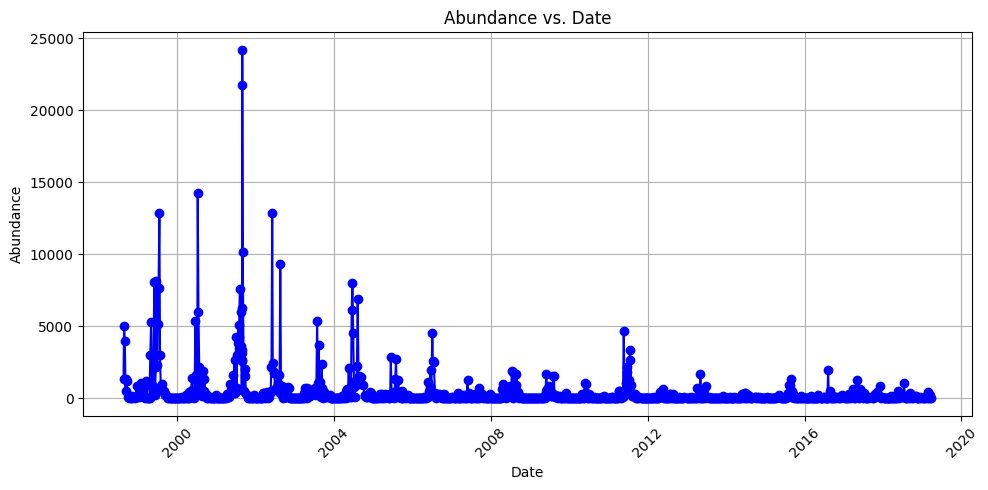

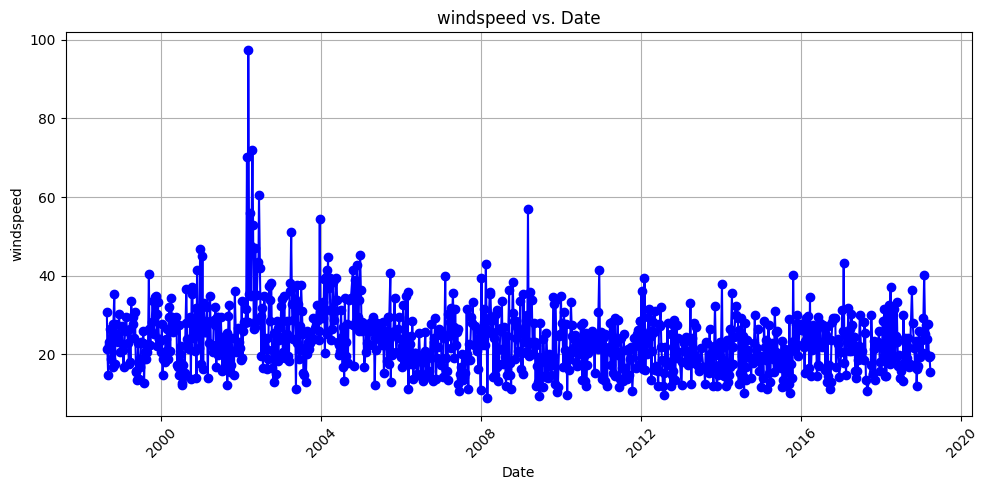

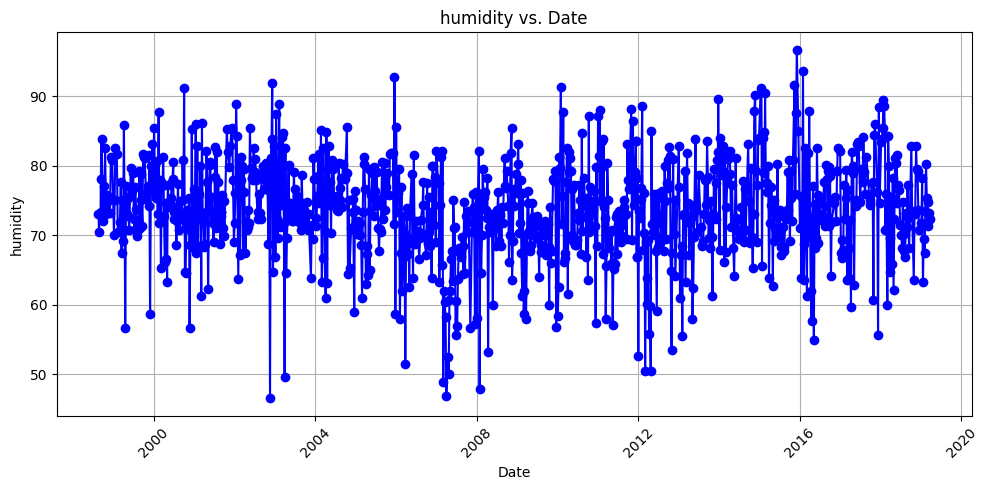

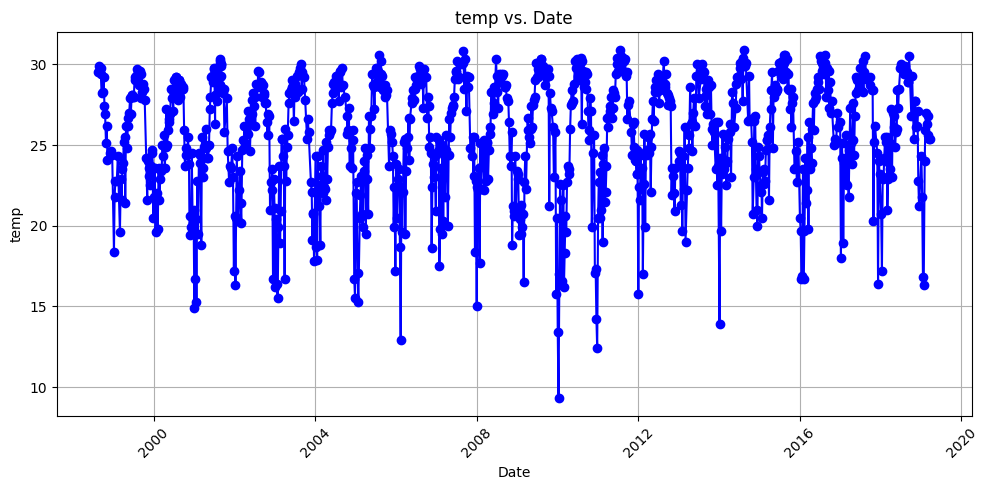

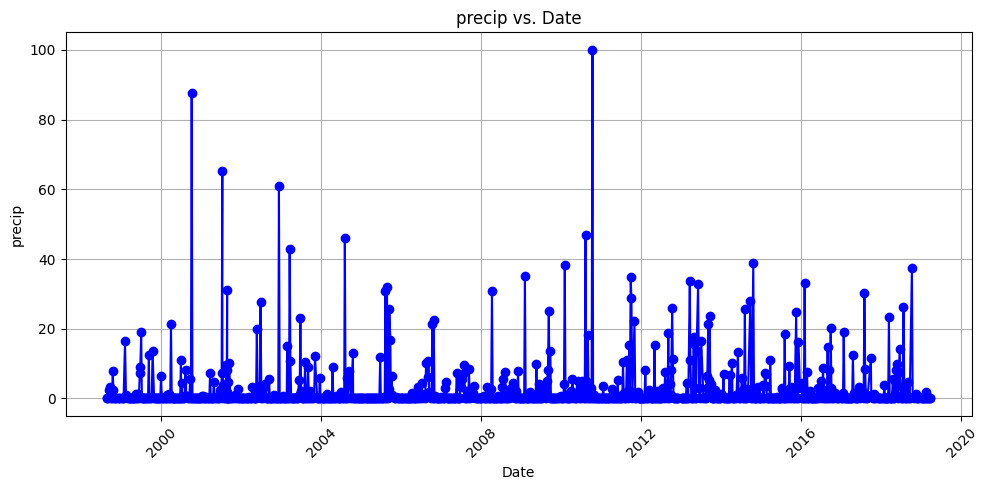

In [117]:
plot_total_vs_date(df)

# Analysis the data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

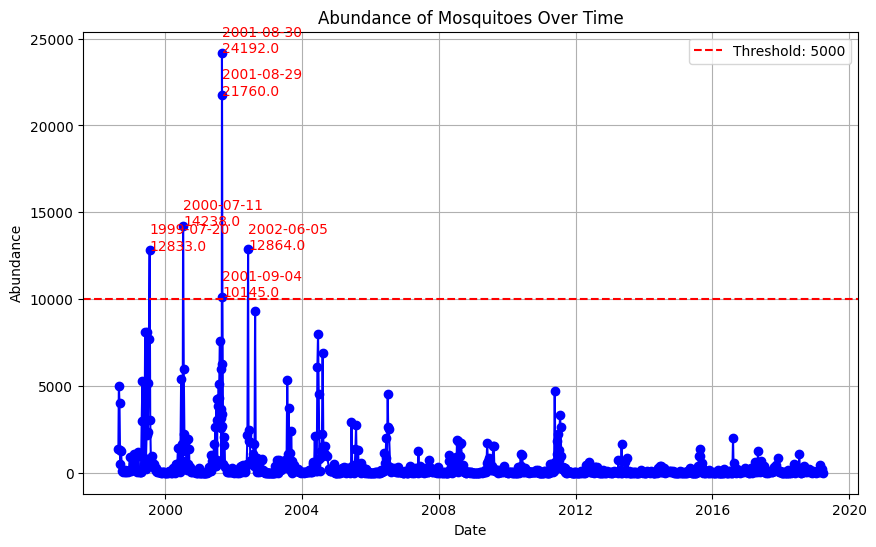

In [99]:
plt.figure(figsize=(10, 6))

# 绘制 'abundance' 数据
plt.plot(df['Date'], df['abundance'], marker='o', linestyle='-', color='blue')

# 添加红色横虚线在 y=5000
plt.axhline(y=10000, color='r', linestyle='--', label='Threshold: 5000')

# 标注大于 5000 的点
for i, row in df.iterrows():
    if row['abundance'] > 10000:
        plt.text(row['Date'], row['abundance'], f"{row['Date'].strftime('%Y-%m-%d')}\n{row['abundance']}", color='red')

# 设置图例
plt.legend()

# 设置标题和轴标签
plt.title('Abundance of Mosquitoes Over Time')
plt.xlabel('Date')
plt.ylabel('Abundance')

# 显示图形
plt.grid(True)
plt.show()

Correlation Matrix:
           abundance  humidity      temp    precip  windspeed
abundance   1.000000  0.014410  0.236537 -0.015222  -0.041613
humidity    0.014410  1.000000  0.135482  0.284626  -0.111418
temp        0.236537  0.135482  1.000000  0.080469  -0.294257
precip     -0.015222  0.284626  0.080469  1.000000   0.045883
windspeed  -0.041613 -0.111418 -0.294257  0.045883   1.000000


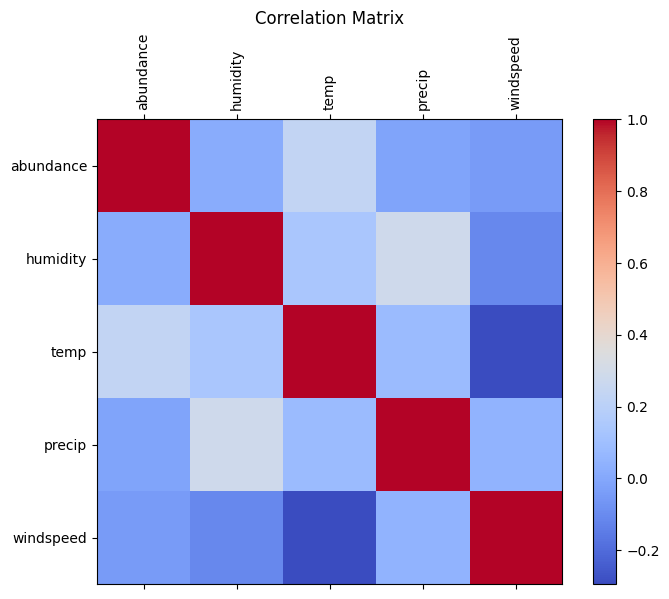

In [100]:
correlation_matrix = df[['abundance', 'humidity', 'temp', 'precip', 'windspeed']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

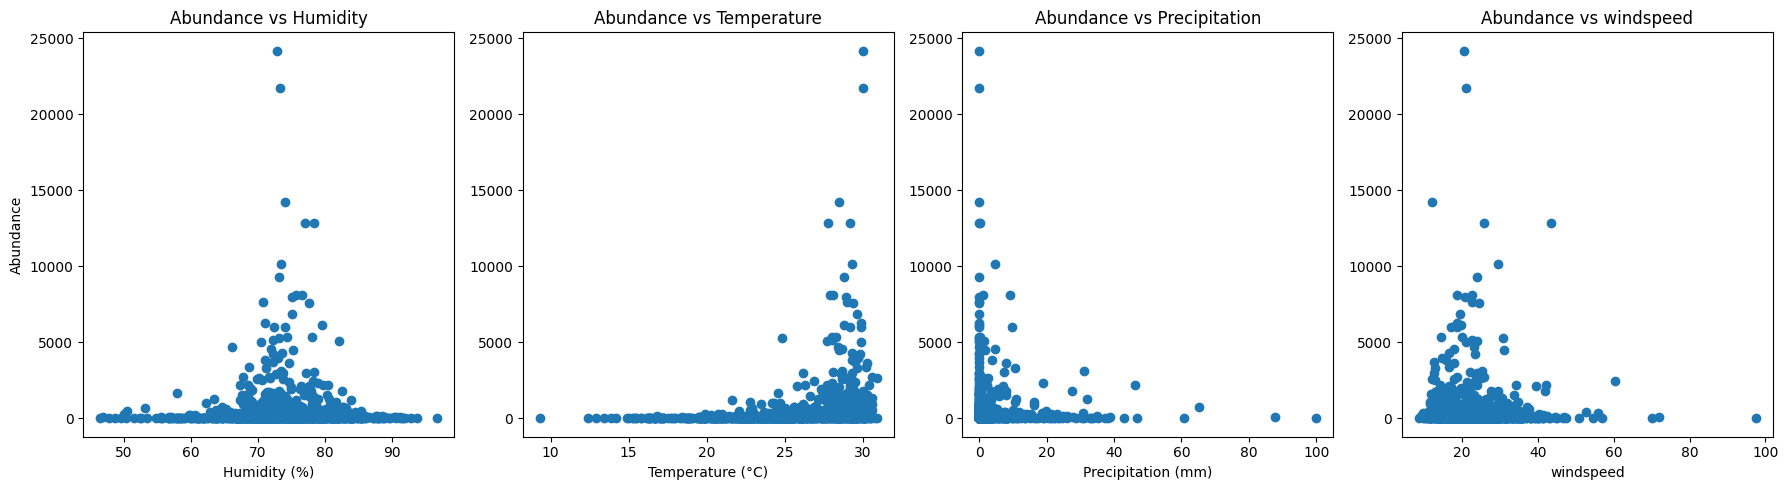

In [103]:

# Scatter plots
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
axes[0].scatter(df['humidity'], df['abundance'])
axes[0].set_title('Abundance vs Humidity')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Abundance')

axes[1].scatter(df['temp'], df['abundance'])
axes[1].set_title('Abundance vs Temperature')
axes[1].set_xlabel('Temperature (°C)')

axes[2].scatter(df['precip'], df['abundance'])
axes[2].set_title('Abundance vs Precipitation')
axes[2].set_xlabel('Precipitation (mm)')

axes[3].scatter(df['windspeed'], df['abundance'])
axes[3].set_title('Abundance vs windspeed')
axes[3].set_xlabel('windspeed')
plt.tight_layout()
plt.show()

# Import the data

In [104]:
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
X = df[['humidity', 'temp', 'precip','windspeed']]
y = df['abundance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 拟合随机森林模型
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                  max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 使用模型进行预测
y_pred = model.predict(X_test)

# 计算测试集的残差
residuals_test = y_test - y_pred

# 输出残差
print("Test residuals:", residuals_test)

Test residuals: 453    -119.527698
792      65.100917
209    -228.592000
309    -141.966423
739    -825.780407
          ...     
78      311.707874
29     1996.756549
277     -22.477857
261     -20.294333
423     -44.374395
Name: abundance, Length: 200, dtype: float64


In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 计算 MSE 和 RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 计算 MAE
mae = mean_absolute_error(y_test, y_pred)

# 计算 R²
r2 = r2_score(y_test, y_pred)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("R² 或决定系数:", r2)

# 特征重要性
feature_importances = model.feature_importances_
features = X.columns
feature_importance_dict = dict(zip(features, feature_importances))
print("特征重要性:", feature_importance_dict)


均方误差 (MSE): 1684702.9445021427
均方根误差 (RMSE): 1297.9610720287965
平均绝对误差 (MAE): 580.5973710730469
R² 或决定系数: -0.269161732822329
特征重要性: {'humidity': 0.20854452876489415, 'temp': 0.46483419695986694, 'precip': 0.060122691911512156, 'windspeed': 0.26649858236372675}


In [107]:
residuals_test

453    -119.527698
792      65.100917
209    -228.592000
309    -141.966423
739    -825.780407
          ...     
78      311.707874
29     1996.756549
277     -22.477857
261     -20.294333
423     -44.374395
Name: abundance, Length: 200, dtype: float64

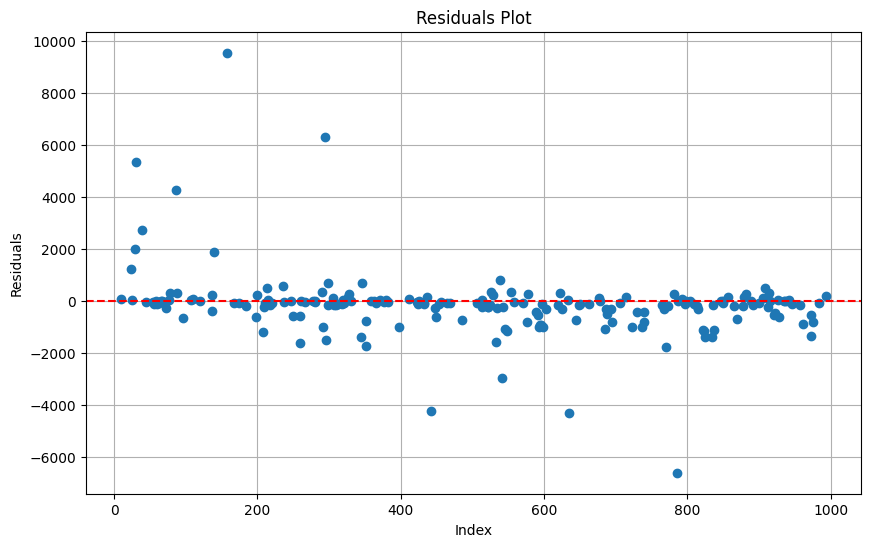

In [108]:
import matplotlib.pyplot as plt

# 假设 residuals_test 是一个 Pandas Series 或 Numpy 数组，包含模型的预测残差
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
plt.plot(residuals_test, marker='o', linestyle='')  # 使用圆圈标记每个点，不连接线条
plt.title('Residuals Plot')  # 设置图形标题
plt.xlabel('Index')  # 设置x轴标签
plt.ylabel('Residuals')  # 设置y轴标签
plt.axhline(y=0, color='r', linestyle='--')  # 画一条红色虚线在y=0
plt.grid(True)  # 显示网格
plt.show()


In [109]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
adf_result = adfuller(residuals_test)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -13.04908686304647
p-value: 2.1607819619898986e-24


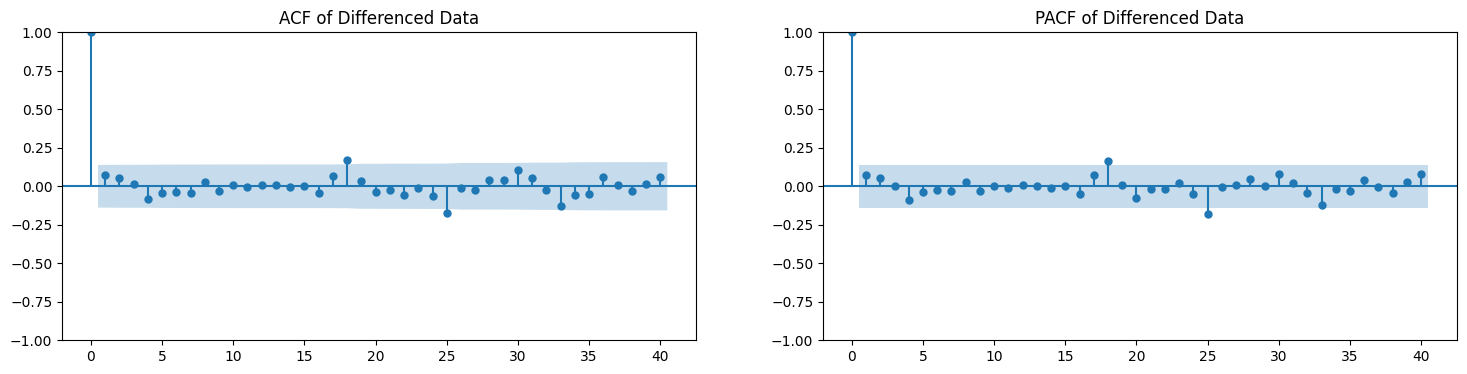

In [110]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_acf(residuals_test, lags=40, ax=ax[0])
ax[0].set_title('ACF of Differenced Data')
plot_pacf(residuals_test, lags=40, ax=ax[1], method='ywm')
ax[1].set_title('PACF of Differenced Data')
plt.show()

In [111]:
split_point = int(len(df) * 0.8)
train, test = residuals_test.iloc[:split_point], df.iloc[split_point:]

In [112]:
train

453    -119.527698
792      65.100917
209    -228.592000
309    -141.966423
739    -825.780407
          ...     
78      311.707874
29     1996.756549
277     -22.477857
261     -20.294333
423     -44.374395
Name: abundance, Length: 200, dtype: float64

In [113]:
from pmdarima import auto_arima
model_auto = auto_arima(train, start_p=0, start_q=0, max_p=25, max_q=25,
                   test='adf', seasonal=False, trace=True, error_action='ignore',
                   suppress_warnings=True, stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3436.995, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3437.538, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3437.740, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3439.086, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3436.227, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3437.173, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3437.318, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3439.050, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.187 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                        SARIMAX   Log Likelihood               -1716.113
Date:                Tue, 06 Aug 2024   AIC                           3436.227
Time:                        10:16:4

In [114]:
model_auto.resid

<bound method ARIMA.resid of ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)>

In [115]:
arima_model = ARIMA(residuals_test, order=(25, 0, 25))  # Note 'd' parameter is now 1
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              abundance   No. Observations:                  200
Model:               ARIMA(25, 0, 25)   Log Likelihood               -1697.716
Date:                Tue, 06 Aug 2024   AIC                           3499.433
Time:                        10:16:54   BIC                           3670.945
Sample:                             0   HQIC                          3568.841
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -152.1905     89.375     -1.703      0.089    -327.362      22.981
ar.L1         -0.1024      0.666     -0.154      0.878      -1.408       1.203
ar.L2          0.1737      0.614      0.283      0.777      -1.030       1.378
ar.L3         -0.2022      0.709     -0.285      0.776      -1.592       1.188
ar.L4         -0.0174      0.686     -0.025      0.980      -1.362       1.327
ar.L5         -0.1310      0.577     -0.227      0.820      -1.261       0.999
ar.L6          0.0311      0.497      0.062      0.950      -0.943       1.005
ar.L7          0.0617      0.489      0.126      0.900      -0.897       1.020
ar.L8          0.1557      0.352      0.443      0.658      -0.533       0.845
ar.L9         -0.0946      0.413     -0.229      0.819      -0.905       0.715
ar.L10        -0.0624      0.352     -0.177      0.859      -0.752       0.627
ar.L11         0.0209      0.359      0.058      0.954      -0.682       0.724
ar.L12         0.0346      0.364      0.095      0.924      -0.679       0.748
ar.L13         0.0700      0.377      0.186      0.853      -0.669       0.809
ar.L14         0.0663      0.378      0.175      0.861      -0.675       0.808
ar.L15        -0.1130      0.364     -0.311      0.756      -0.826       0.600
ar.L16        -0.0774      0.354     -0.219      0.827      -0.771       0.617
ar.L17        -0.0557      0.351     -0.159      0.874      -0.744       0.633
ar.L18         0.3429      0.335      1.022      0.307      -0.314       1.000
ar.L19         0.0110      0.464      0.024      0.981      -0.898       0.920
ar.L20        -0.4756      0.426     -1.116      0.264      -1.311       0.360
ar.L21         0.2046      0.569      0.360      0.719      -0.910       1.319
ar.L22         0.3037      0.592      0.513      0.608      -0.856       1.463
ar.L23         0.1648      0.667      0.247      0.805      -1.142       1.471
ar.L24         0.1339      0.587      0.228      0.820      -1.016       1.284
ar.L25        -0.1211      0.526     -0.230      0.818      -1.152       0.910
ma.L1          0.1141      0.630      0.181      0.856      -1.120       1.348
ma.L2         -0.0693      0.922     -0.075      0.940      -1.877       1.738
ma.L3          0.2448      0.874      0.280      0.779      -1.468       1.958
ma.L4         -0.1149      0.828     -0.139      0.890      -1.738       1.508
ma.L5          0.0856      0.944      0.091      0.928      -1.765       1.936
ma.L6          0.0197      0.846      0.023      0.981      -1.639       1.678
ma.L7         -0.0285      0.694     -0.041      0.967      -1.388       1.331
ma.L8         -0.1564      0.586     -0.267      0.789      -1.304       0.991
ma.L9          0.0217      0.931      0.023      0.981      -1.802       1.846
ma.L10         0.0082      0.541      0.015      0.988      -1.052       1.069
ma.L11         0.0159      0.594      0.027      0.979      -1.149       1.181
ma.L12         0.0078      0.738      0.011      0.992      -1.438       1.454
ma

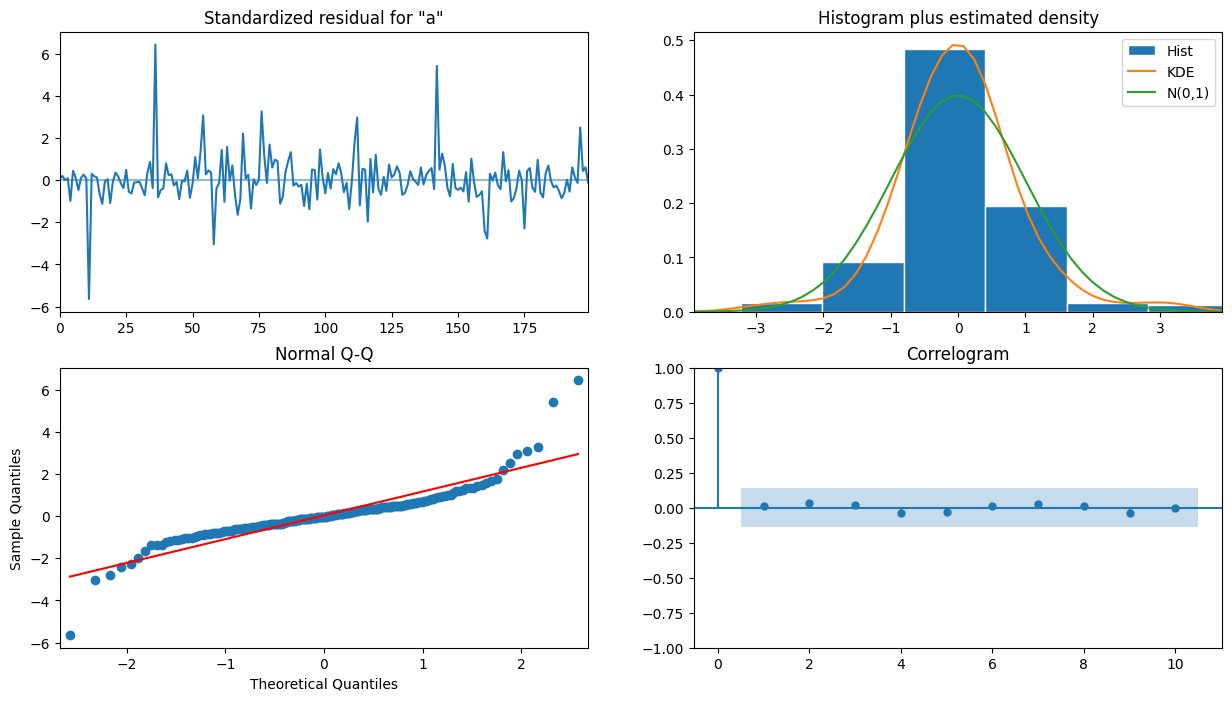

In [56]:
arima_model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

In [57]:
predictions = arima_model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
print(predictions)

200    1021.877104
201      92.519256
202    -329.623753
203    -878.055607
204    -325.458426
          ...     
395    -521.781492
396    -549.407196
397    -505.447434
398     -68.211652
399     237.005241
Name: predicted_mean, Length: 200, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [41]:
test_values = test['abundance'].values  # Replace 'abundance' with the actual target column name

# Convert predictions to a numpy array if not already (depending on output of ARIMA)
predictions_array = np.array(predictions)

# Calculate the error metrics
mse = mean_squared_error(test_values, predictions_array)
mae = mean_absolute_error(test_values, predictions_array)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  377644.5478164432
Mean Absolute Error:  447.84300211892486
Root Mean Squared Error:  614.5279064586434


In [58]:
final_prediction = y_pred[-200:] + predictions

In [59]:
# 计算 MSE 和 RMSE
mse = mean_squared_error(y_test, final_prediction)
rmse = np.sqrt(mse)

# 计算 MAE
mae = mean_absolute_error(y_test, final_prediction)

# 计算 R²
r2 = r2_score(y_test, final_prediction)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("R² 或决定系数:", r2)

均方误差 (MSE): 1933343.6723945963
均方根误差 (RMSE): 1390.447292202979
平均绝对误差 (MAE): 820.45115574804
R² 或决定系数: -0.45647386288775516
